# Part 1: Practical things
*(useless)*

# Part 2: Statistics
All the imports:

In [1]:
import numpy as np
import random as rn
from collections import Counter
from matplotlib import pyplot as plt
from scipy import stats
import urllib2
import re
import math
from prettytable import PrettyTable
%matplotlib inline

## 2.1 Walkthrough Chapter 5:

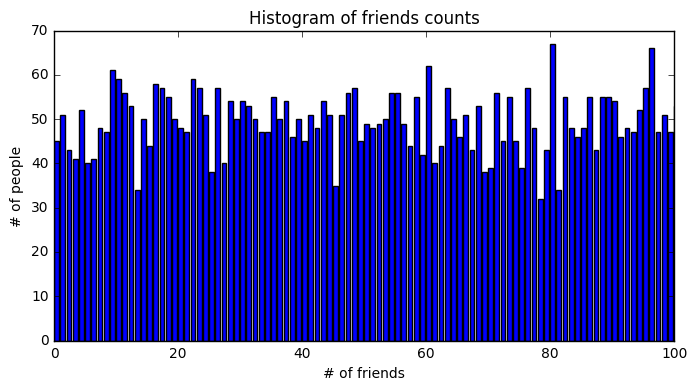

In [7]:
N = 5000 #Number of points
num_friends = [rn.randint(0,100) for _ in range(N)] #I generate a random distribution of number of friends for 5000 people
friends_counts = Counter(num_friends) #Simple frequency counter (dict)

#Let's plot the histogram in a bar chart
x = range(101)
y = [friends_counts[i] for i in friends_counts]
plt.figure(figsize=(8,4))
plt.bar(x,y)
plt.axis([0,100,0,70])
plt.title("Histogram of friends counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

### Simple statistics

In [64]:
#Mean and medians
mean = np.mean(num_friends)
median = np.median(num_friends)
print "Mean value: %.3f" %mean
print "Median value: %d" %median

#Percentile/Quantile
for i in [10,25,75,90]:
    print "%d th percentile value in 'friends': %.1f" %(i,np.percentile(num_friends,i))
    
#Mode
mode = stats.mode(num_friends)
print "Mode:",mode.mode,"Mode count:",mode.count

Mean value: 50.334
Median value: 50
10 th percentile value in 'friends': 9.0
25 th percentile value in 'friends': 24.0
75 th percentile value in 'friends': 76.0
90 th percentile value in 'friends': 91.0
Mode: [98] Mode count: [69]


### Dispersion
Dispersion refers to measures of how spread out our data is. Typically they’re statistics
for which values near zero signify not spread out at all and for which large values
(whatever that means) signify very spread out.

First example: `range` (simple difference between max and min value: not very descriptive)

Second example: `variance`

In [69]:
variance = np.var(num_friends)
print "Variance: %.3f" %variance

std = np.std(num_friends)
print "Standard deviation: %.3f" %std

Variance: 867.329
Standard deviation: 29.450


### Theory questions
* Mean and median: Explain the difference between the mean and the median in your own words. In what kinds of dataset are the mean and median similar? Can you think of a dataset where the mean and median would be very different?
* Variance: Explain the variance in your own words.
* A paradox: What is Simpson's Paradox. Provide your own example of a dataset where this issue occurs.

*(extremely simple)*

## 2.2 Exercises
Each data file is a `.tsv`, where first column is $x$ and second column is $y$.

In [2]:
data_urls = ["https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv"]
data_files = [urllib2.urlopen(url).read() for url in data_urls]

#Cleaning and converting from string to arrays using Regex
datasets = []
for d in data_files:
    lines = re.split(r'\n',d)
    x = [float(re.split(r'\t',line)[0]) for line in lines]
    y = [float(re.split(r'\t',line)[1]) for line in lines]
    datasets.append((x,y))

Pretty printing the datasets (`datasets` is a list of *tuples*, where each tuple contains 2 lists, the x and y values):

In [98]:
for num,d in enumerate(datasets):
    x = PrettyTable(field_names=['x','y'])
    for i in range(len(d[0])):
        x.add_row([d[0][i],d[1][i]])
    print "Dataset No.",num+1
    print x,'\n'

Dataset No. 1
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  8.04 |
| 8.0  |  6.95 |
| 13.0 |  7.58 |
| 9.0  |  8.81 |
| 11.0 |  8.33 |
| 14.0 |  9.96 |
| 6.0  |  7.24 |
| 4.0  |  4.26 |
| 12.0 | 10.84 |
| 7.0  |  4.82 |
| 5.0  |  5.68 |
+------+-------+ 

Dataset No. 2
+------+------+
|  x   |  y   |
+------+------+
| 10.0 | 9.14 |
| 8.0  | 8.14 |
| 13.0 | 8.74 |
| 9.0  | 8.77 |
| 11.0 | 9.26 |
| 14.0 | 8.1  |
| 6.0  | 6.13 |
| 4.0  | 3.1  |
| 12.0 | 9.13 |
| 7.0  | 7.26 |
| 5.0  | 4.74 |
+------+------+ 

Dataset No. 3
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  7.46 |
| 8.0  |  6.77 |
| 13.0 | 12.74 |
| 9.0  |  7.11 |
| 11.0 |  7.81 |
| 14.0 |  8.84 |
| 6.0  |  6.08 |
| 4.0  |  5.39 |
| 12.0 |  8.15 |
| 7.0  |  6.42 |
| 5.0  |  5.73 |
+------+-------+ 

Dataset No. 4
+------+------+
|  x   |  y   |
+------+------+
| 8.0  | 6.58 |
| 8.0  | 5.76 |
| 8.0  | 7.71 |
| 8.0  | 8.84 |
| 8.0  | 8.47 |
| 8.0  | 7.04 |
| 8.0  | 5.25 |
| 19.0 | 12.5 |
| 8.0  | 5.5

* *Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset. Use python string formatting to print precisely two decimal places of these results to the output cell.* 

In [105]:
for i,data in enumerate(datasets):
    print "Mean in dataset %d -> x-values: %.2f, y-values: %.2f" %(i+1,np.mean(data[0]),np.mean(data[1]))

Mean in dataset 1 -> x-values: 9.00, y-values: 7.50
Mean in dataset 2 -> x-values: 9.00, y-values: 7.50
Mean in dataset 3 -> x-values: 9.00, y-values: 7.50
Mean in dataset 4 -> x-values: 9.00, y-values: 7.50


* *Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).*

In [106]:
for i,data in enumerate(datasets):
    print "Variance in dataset %d -> x-values: %.3f, y-values: %.3f" %(i+1,np.var(data[0]),np.var(data[1]))

Variance in dataset 1 -> x-values: 10.000, y-values: 3.752
Variance in dataset 2 -> x-values: 10.000, y-values: 3.752
Variance in dataset 3 -> x-values: 10.000, y-values: 3.748
Variance in dataset 4 -> x-values: 10.000, y-values: 3.748


* *Use numpy to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between x- and y-values for all four data sets (also to three decimal places).*

Pearson's correlation coefficient when applied to a population is commonly represented by the Greek letter ρ (rho) and may be referred to as the population correlation coefficient or the population Pearson correlation coefficient.

In [109]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

#According to Wikipedia's formula:
def pearson_correlation(x,y):
    return covariance(x,y)/(np.std(x)*np.std(y))

for i,d in enumerate(datasets):
    print "Pearson correlation of dataset %d: %.3f" %(i+1,pearson_correlation(d[0],d[1]))

Pearson correlation of dataset 1: 0.898
Pearson correlation of dataset 2: 0.898
Pearson correlation of dataset 3: 0.898
Pearson correlation of dataset 4: 0.898


* *The next step is use linear regression to fit a straight line $f(x)=ax+b$ through each dataset and report a and b (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. It works like this:*

`from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)`

* *Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two subplot to put all of the plots nicely in a grid and use the same x and y range for all four plots. And include the linear fit in all four plots.*

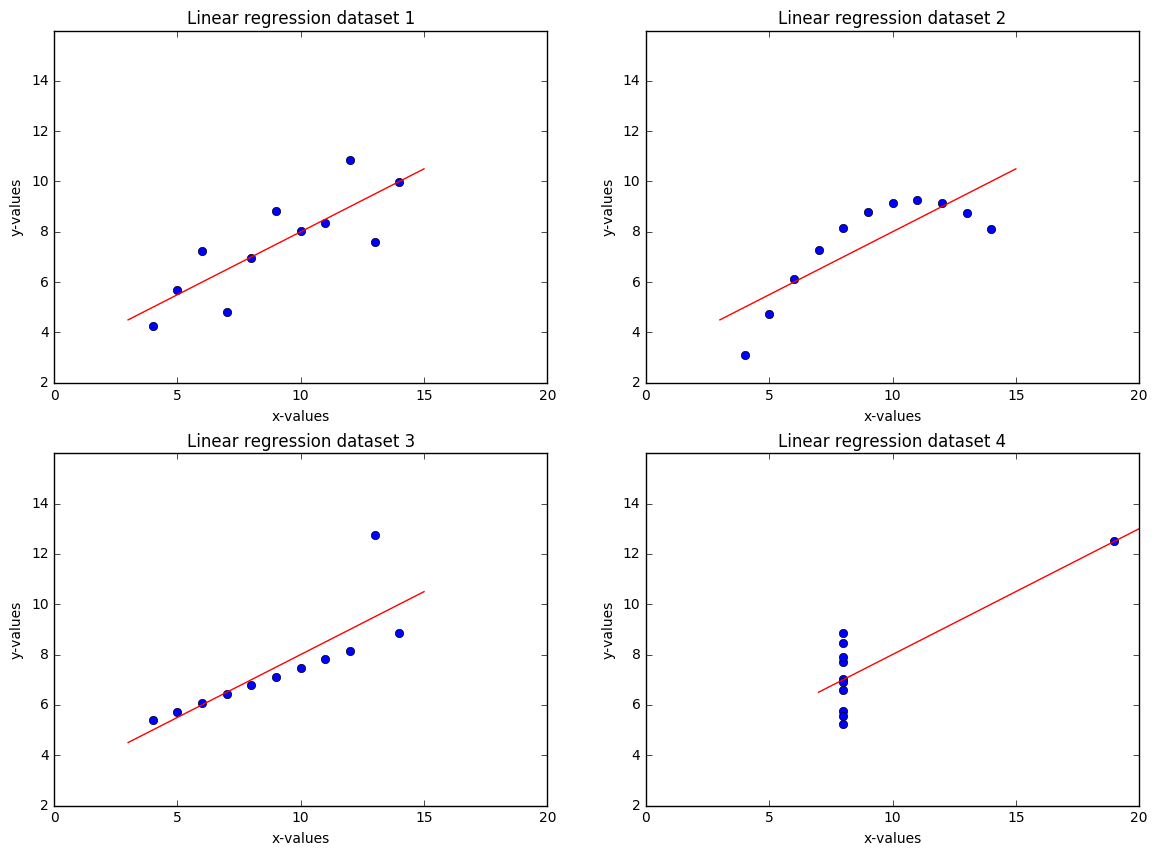

In [4]:
#I plot both the points and the linear regression
plt.figure(figsize=(14,10))
for i,d in enumerate(datasets): 
    slope, intercept, r_value, p_value, std_err = stats.linregress(d[0],d[1])
    plt.subplot(2,2,i+1)
    plt.plot(d[0],d[1],'bo')
    plt.xlabel("x-values")
    plt.ylabel("y-values")
    plt.title("Linear regression dataset %d" %(i+1))
    plt.xticks(np.arange(0,21,5))
    plt.yticks(np.arange(2,16,2))
    plt.xlim([0,20])
    plt.ylim([2,16])
    x = np.linspace(min(d[0])-1,max(d[0])+1)
    y = slope*x+intercept #linear fit
    plt.plot(x,y,'r-')
plt.show()

* *Explain - in your own words - what you think my point with this exercise is.*

With basic statistics we didn't see great differences between the datasets (all of them returned same values for mean, variance and correlation). However, plotting the datasets we find out that the datasets are all different and each of them has something that could be pointed out (check [this page](https://en.wikipedia.org/wiki/Anscombe%27s_quartet))

# Part 3: Probability

*There's a nice example in the book where Joel illustrates the conditional probablity of “both children are girls” conditional on the event “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older sister is a girl" using the little code-snippet reproduced below.*

In [5]:
import random
from __future__ import division

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    middle = random_kid()
    older = random_kid() 
    
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls / older_girl # 0.514 ~ 1/2 
print "P(both | either): ", both_girls / either_girl # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either):  0.341541328364


*Let's imagine a new family with three children. Assuming that each child is equally likely to be a boy or a girl, and that the gender of each subsequent child is independent of the gender of its older siblings. Use Python code to answer the following questions.*

* *What is the probability of three girls?*
* *What is the probability of two girls and one boy?*
* *What is the probability of one girl and two boys?*
* *What is the probability of three boys?*

In [4]:
import random
from __future__ import division

def random_kid():
    return random.choice(["boy", "girl"])

all_girls = 0
two_girls = 0
one_girl = 0
all_boys = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    middle = random_kid()
    older = random_kid() 
    
    if older == "girl" and younger == "girl" and middle =="girl":
        all_girls += 1
    if (older == "girl" and younger == "girl" and middle == "boy") or \
    (older == "girl" and middle == "girl" and younger == "boy") or \
    (middle == "girl" and younger == "girl" and older == "boy"):
        two_girls += 1    
    if (older == "girl" and younger == "boy" and middle == "boy") or \
    (younger == "girl" and middle == "boy" and older == "boy") or \
    (middle == "girl" and younger == "boy" and older == "boy"):
        one_girl += 1 
    if older == "boy" and younger == "boy" and middle =="boy":
        all_boys += 1


print "P(all_girls): ", all_girls / 10000 # 1/8 
print "P(two_girls, one_boy): ", two_girls / 10000 # 1/8
print "P(one_girl, two_boys): ", one_girl / 10000 # 1/8
print "P(all_boys): ", all_boys / 10000 # 1/8

P(all_girls):  0.1249
P(two_girls, one_boy):  0.3782
P(one_girl, two_boys):  0.3771
P(all_boys):  0.1198


All combinations of 3 children are 8 in total:
    1. 1st girl,   2nd girl,   3rd girl
    2. 1st girl,   2nd boy,    3rd boy
    3. 1st boy,    2nd girl,   3rd boy
    4. 1st boy,    2nd boy,    3rd girl
    5. 1st girl    2nd girl,   3rd boy
    6. 1st boy     2nd girl,   3rd girl
    7. 1st girl    2nd boy,    3rd girl
    8. 1st boy     2nd boy,    3rd boy
    
So, the probability of three girls is 1 out of those 8 combinations, meaning **1/8**.    
The probability of three boys is again 1 out of 8, meaning **1/8**.    
The probability of two girls and one boy is either combination 4 or 5 or 6. So it is **3/8**.    
The same goes with probability of two boys and one girl. It can be either 2 or 3 or 4. So it is **3/8**.    

The general math behind it is the binomial formula: $$b(n,k;p)=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$$
$n=$ number of observations(3 children)    
$k=$ number of defined observations(1 girl)    
$p=$ probability of defined observation(50%)    

* *What is the probability that all children are girls given that the oldest child is a girl?*

In [17]:
all_girls = 0
oldest_girl = 0

for _ in range(10000):
    youngest = random_kid()
    older = random_kid()
    oldest = random_kid()
    
    if older=="girl" and youngest=='girl' and oldest=="girl":
        all_girls+=1
    if oldest=="girl":
        oldest_girl+=1
print "P(all_girls | oldest_girl):", all_girls / oldest_girl # P(E|F) = P(E,F)/P(F) = 1/(2^3)/(1/2) = (1/2^3)*2 = 1/4 = 0.25

P(all_girls | oldest_girl): 0.25094302164


* *What is the probability that all children are girls given that one of the children is a girl?*

In [22]:
all_girls = 0
either_girl = 0

for _ in range(10000):
    youngest = random_kid()
    older = random_kid()
    oldest = random_kid()
    
    if older=="girl" and youngest=='girl' and oldest=="girl":
        all_girls+=1
    if older=="girl" or youngest=="girl" or oldest=="girl":
        either_girl+=1
print "P(all_girls | either_girl):", all_girls / either_girl # P(E|F) = P(E,F)/P(F) = 1/(2^3)/(1-1/2^3) = 1/8 / 7/8 = 1/7

P(all_girls | either_girl): 0.14116575592


## Exercise: Central limit theorem

*The central limit theorem is fun because we can get Gaussian distributions from probability distributions that are not Gaussian. Let's explore that in the following exercise.*
* *Use Python's random module to simulate rolling a fair six-sided die 10 000 000 times.*
* *Plot the distribution of dice rolls using a bar-chart.*

In [4]:
results = [rn.choice(range(1,7)) for _ in range(10000000)]
results_counter = Counter(results)  

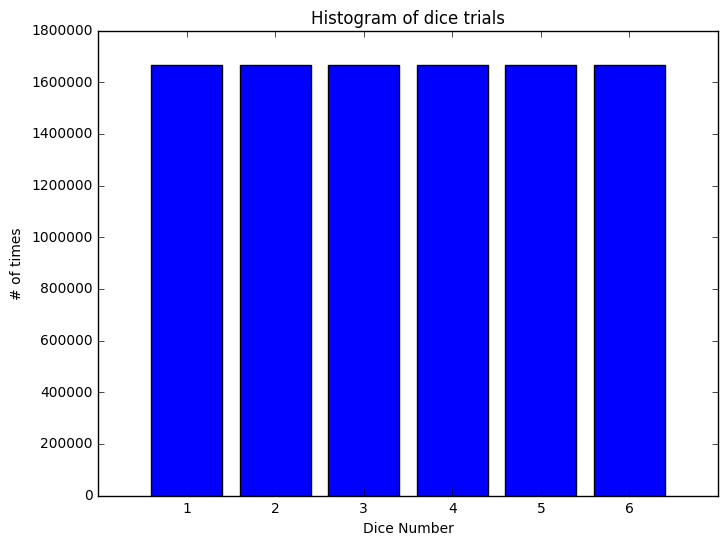

In [15]:
plt.figure(figsize=(8,6))
x = range(1,7)
y = [results_counter[i] for i in results_counter]
plt.bar(x,y,align="center")
plt.title("Histogram of dice trials")
plt.ylabel("# of times")
plt.xlabel("Dice Number")
plt.xticks(x)
plt.show()

It's obvious that the shape of the distribution is steady.

* *Now perform a new simulation. Roll a fair six-sided dice 10 times and take the average. Do that 1 000 000 times.*

In [16]:
avg_values = [np.mean([rn.choice(range(1,7)) for _ in range(10)]) for _ in range(1000000)]

* *Plot the distribution of those average values. This time you can't use counter (since the averages are not integer values). Instead use numpy.histogram to bin those number into 25 bins. What does the numpy.histogram function return? Do the two arrays have the same length?*

In [20]:
hist, bin_edges = np.histogram(avg_values,bins=25)
print "Same length:",len(hist)==len(bin_edges)

Same length: False


* *Then let's use matplotlib.pyplot.bar to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.*

In order to deal with the problem of the different lengths, one solution is to actually create our own bins according to the `bin_edges` obtained with `np.histogram`: to reduce the number from 26 to 25, I can create a new list of bins where the each element (**j**) is obtained as the midpoint between two edges. Then, we say that a specific element **i** in `avg_values` falls inside bin **j** if it's greater than and stricly less than (respectively) the left and right edges of the bin **j**.

In [79]:
bins = [0]*len(hist) #Initialize new empty list of 25 zeros
bin_names = [round((bin_edges[i]+bin_edges[i+1])/2,3) for i in range(len(bin_edges)-1)] #let's keep the bin_names as the midpoint between the two edges

for i in range(len(avg_values)):
    if avg_values[i]==bin_edges[-1]: #special case: last value of bin_edges
            bins[-1]+=1
    for j in range(len(bin_edges)-1):
        if avg_values[i]>=bin_edges[j] and avg_values[i]<bin_edges[j+1]:
            bins[j]+=1

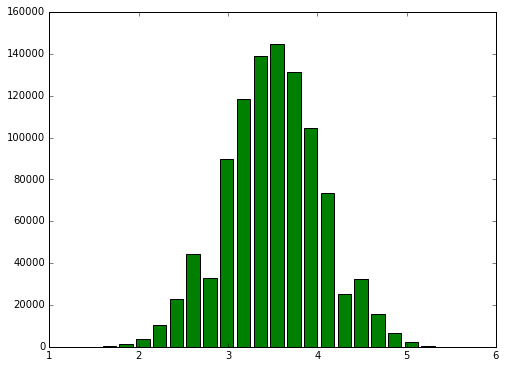

In [80]:
#Plotting
plt.figure(figsize=(8,6))
plt.bar(bin_names,bins,align="center",width=0.15,color="g")
plt.show()

* *Describe the shape of this distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.*

The explanation lies in the **central limit theorem**: it says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables (in our case, the die-roll) is itself approximately normally distributed.

* *Calculate the mean $μ$ and standard deviation $σ observed$ of the averaged values. *

In [83]:
mean = np.mean(avg_values)
std = np.std(avg_values)

print "Mean:",mean
print "Standard deviation:",std

Mean: 3.4997707
Standard deviation: 0.539793402536


# Part 4: Hypothesis and inference

## Exercises (Questions)

* *What's the null hypothesis when testing if a coin is fair?*

We’ll make the assumption that the coin has some probability p of landing heads. So the null hypothesis would be that the coin is fair, meaning that p=0.5

* *Explain in your own words what Joel means by significance on p. 83.*

Significance is how willing we are to make a type 1 error (“false positive”), in which we reject the null hypothesis even though it’s true. For reasons lost to the annals of history, this willingness is often set at 5% or 1%. In other words, significance is the probability of rejecting the null hypothesis, given that it is true.

* *Explain in your own words what Joel means by power on p. 83.*

The power of a test, is the probability of not making a type 2 error(“false negative”), in which we fail to reject the null hypothesis even though it’s false. In other words, power is the probability of rejecting the null hypothesis, given that is's false.

* *Write down a short definition of p-value.*

When one performs a hypothesis test, a p-value helps to determine the significance of the results. All hypothesis tests use a p-value to weigh the strength of the evidence (what the data are telling about the population). The p-value is a number between 0 and 1.
* A small p-value (≤ 0.05) indicates strong evidence against the null hypothesis, so one can reject the null hypothesis
* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so one can fail to reject the null hypothesis
* p-values very close to the cutoff (0.05) are considered to be marginal (could go either way).

Let's suppose that a pizza place claims their delivery times are 30 minutes or less on average but you think it’s more than that. You conduct a hypothesis test because you believe the null hypothesis, Ho, that the mean delivery time is 30 minutes max, is incorrect. Your alternative hypothesis (Ha) is that the mean time is greater than 30 minutes. Later you randomly sample some pizza delivery times and run the data through the hypothesis test.    
If p-value turns out to be 0.001, which is much less than 0.05, there is a probability of 0.001 that one will mistakenly reject the pizza place’s claim that their delivery time is less than or equal to 30 minutes. Since typically we are willing to reject the null hypothesis when this probability is less than 0.05, you conclude that the pizza place is wrong; their delivery times are in fact more than 30 minutes on average


* *Explain the problem with p-hacking.*

P-hacking is the use of data mining to uncover patterns in data that can be presented as statistically significant, without first devising a specific hypothesis as to the underlying causality. In other words, one can remove the right outliers, and he/she can probably get his/her p-value below 0.05.